In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as p
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import os
import copy
sns.set_style('white')
sns.set_style('ticks')
sns.set_color_codes()
sns.set_context('paper')

fgm_simulation_path = '../code/simulations.py'
sys.path.append(os.path.dirname(os.path.expanduser(fgm_simulation_path)))


from simulations import simulation, nball_pull, gaussian_fitness

tools_path = '../code/tools.py'
sys.path.append(os.path.dirname(os.path.expanduser(tools_path)))

import tools
import graphs



In [2]:
np.random.seed(953527608) # for exact figure reproducibility use this seed
# np.random.seed(None)

In [3]:
n_close_conditions = 50
n_far_conditions = 0
n_conditions = n_close_conditions + n_far_conditions

n_mutants = 100


d_list = [2,3,4,5,10,20,30,40,49]

entry_dict = {}

for this_d in d_list:

    d_true_close = this_d
    d_true_far = 0
    d_true = d_true_close + d_true_far

    mutant_center = np.asarray([1.0]+[0.0]*(d_true-1))
    condition_center = np.asarray([2.0]+[0.0]*(d_true-1))
    condition_points = []
    for c in range(n_close_conditions):
    #             condition_points.append(list(nball_pull(d_true,0.1,[1.0]+[1.0]*(d_true-1),fixed_radius=True)))
        condition_points.append(list(nball_pull(d_true,0.1,[1.0]+[1.0]*(d_true_close-1)+[0.0]*(d_true_far),fixed_radius=True)))

    for c in range(n_far_conditions):
    #             condition_points.append(list(nball_pull(d_true,0.1,[1.0]+[1.0]*(d_true-1),fixed_radius=True)))
        condition_points.append(list(nball_pull(d_true,0.1,[1.0]+[1.0]*(d_true_close-1)+[1.0]*(d_true_far),fixed_radius=True)))

    mutant_points = []
    for m in range(n_mutants):
    #             mutant_points.append(list(nball_pull(d_true,1.0,[1.0]+[1.0]*(d_true-1),fixed_radius=True)))
        mutant_points.append(list(nball_pull(d_true,0.1,[1.0]+[1.0]*(d_true-1),fixed_radius=True)))
    Ancestor = np.asarray([0.0]+[0.0]*(d_true-1))
    Mutants = mutant_center + np.asarray(mutant_points)
    Conditions = condition_center + np.asarray(condition_points)
    f = tools.calculate_fitness_linear(Mutants,Conditions,Ancestor)
    
    entry_dict[this_d] = [f,Mutants,Conditions,Ancestor]



# plt.plot(tools.SVD_fits(f)[0])

0.0005266350545179018
1.352505677138294e-11
5.237895389987787e-06 1.2416348035245177e-11 2.3704841564760856e-06
2
0.0016652130066821397
1.3522563286762956e-10
5.240102317718112e-06 1.2469504656037864e-10 2.3796299957493794e-05
2
0.005241795428383984
1.339922395558216e-09
5.240082106991378e-06 1.2594740659056695e-09 0.00024035387999460253
2
0.01665498209740202
1.3526984683182685e-08
5.257579948111943e-06 1.3034933870116894e-08 0.002479264984795502
2
0.05242560323603752
1.3402818174481392e-07
5.2618701949317935e-06 1.1880336732985418e-07 0.022578163833133887
2
0.16617454894800976
1.3469497192220357e-06
1.4005165905442428e-06 1.2048760905059232e-06 0.8603083309692937
3
0.000525338592659291
1.3978336349184525e-11
2.054198774685999e-06 1.3609964394082887e-11 6.62543691574506e-06
3
0.001664838603910363
1.403850161920622e-10
2.0574275281931132e-06 1.3105255062425704e-10 6.369728645526135e-05
3
0.0052653105568523165
1.404190100397452e-09
2.049257733065132e-06 1.2897294381409387e-09 0.000629364

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


0.005247083925848858
1.3809932565088258e-09
6.704866379884169e-07 1.2527899206619226e-09 0.0018684785791116172
5
0.016679602826924277
1.3954818871011929e-08
6.671997985275933e-07 1.1851406398913753e-08 0.017762904642759147
5
0.05242553132471195
1.3785913781618426e-07
7.060770745579894e-07 1.280162237668105e-07 0.18130630263976466
5
0.16649761675351793
1.3907354841470204e-06
1.5469649758511932e-06 1.1805207216091436e-06 0.7631205231130592
5
0.0005260897965379026
1.3712158405490086e-11
7.215327918793543e-08 1.1570039319858452e-11 0.00016035361732794328
10
0.0016672116543964214
1.377107244414554e-10
7.256924428277404e-08 1.2127686424352132e-10 0.0016711881933199233
10
0.0052662461707715215
1.37401026070497e-09
7.243865721179433e-08 1.1264584305082312e-09 0.01555051506842155
10
0.01668256135510822
1.3788517075271803e-08
7.354118052044608e-08 1.0548904539665562e-08 0.14344214309604036
10
0.05255300866295414
1.3683035137012208e-07
1.6061184997796626e-07 1.1359336593181441e-07 0.7072539538483

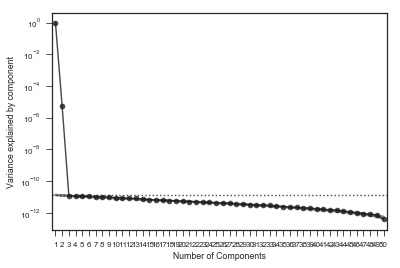

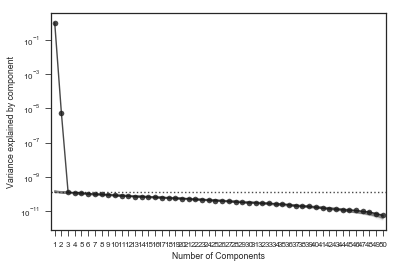

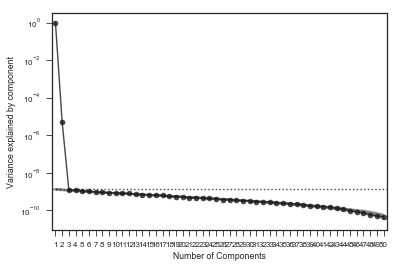

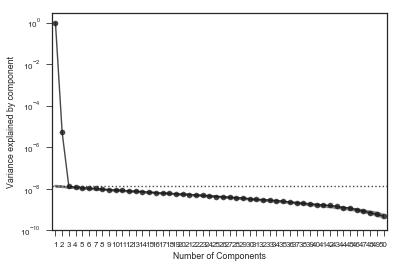

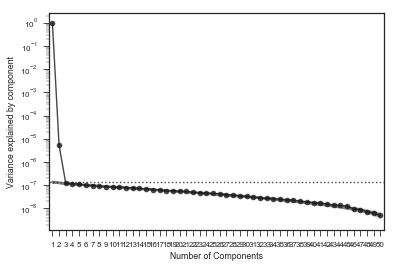

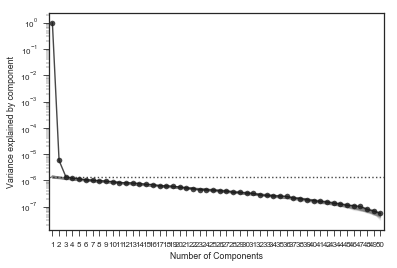

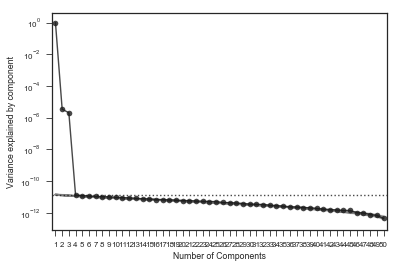

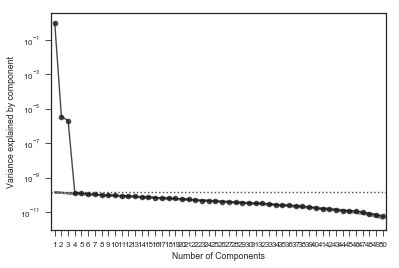

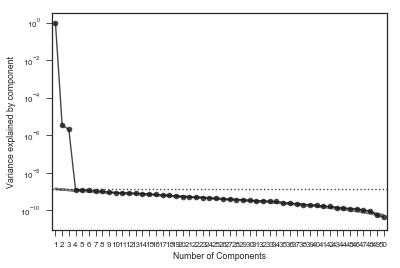

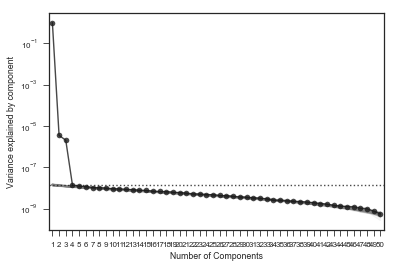

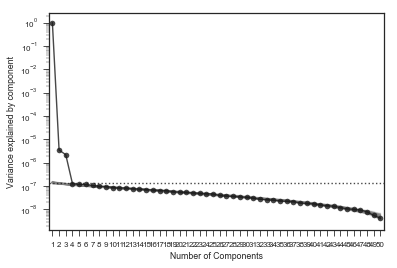

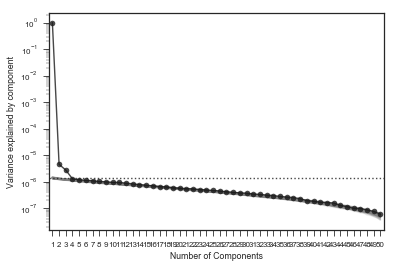

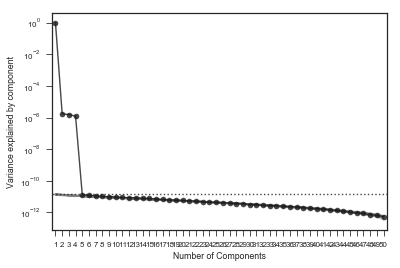

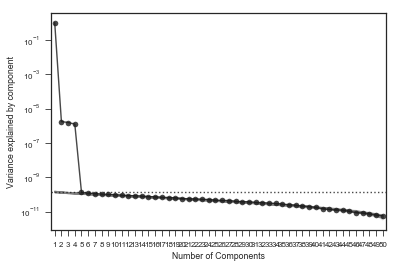

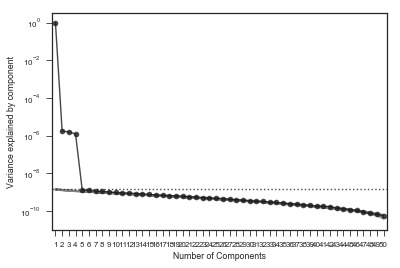

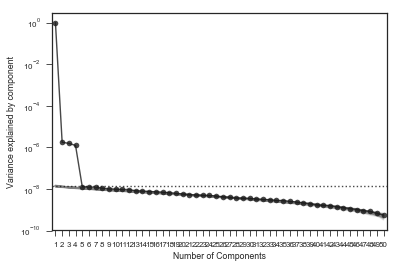

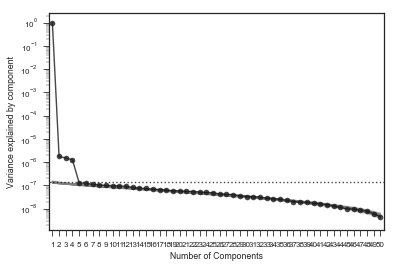

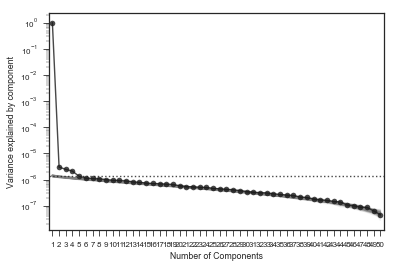

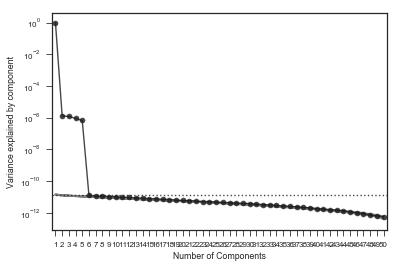

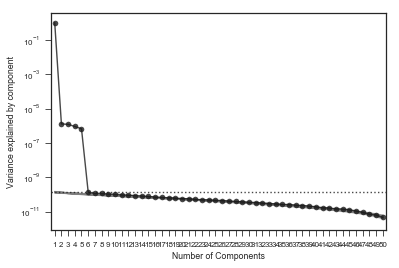

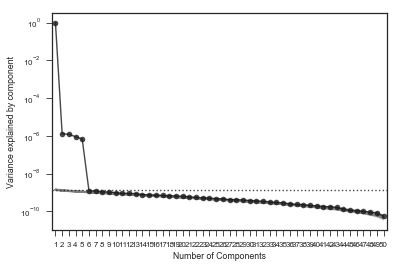

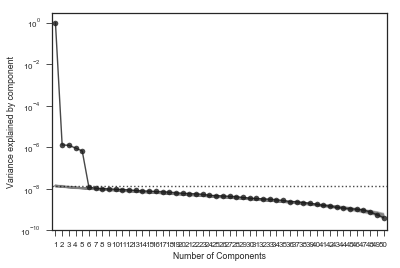

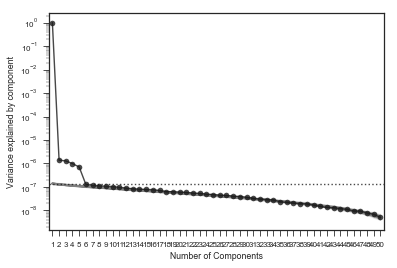

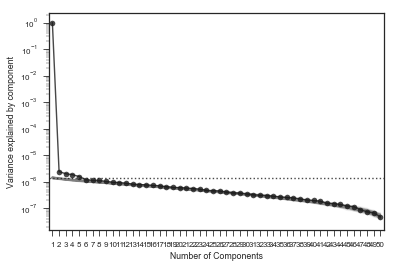

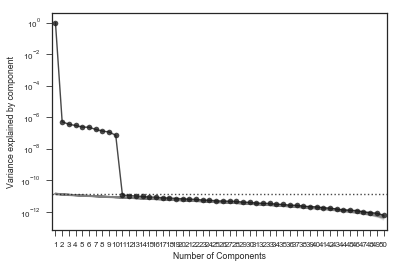

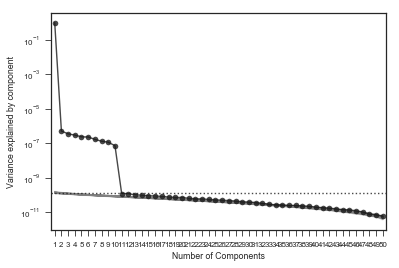

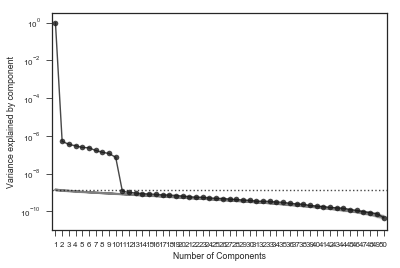

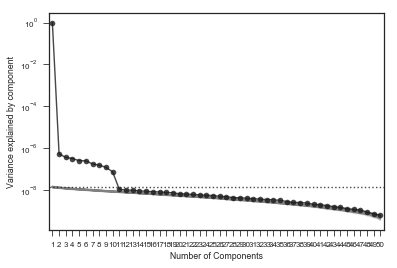

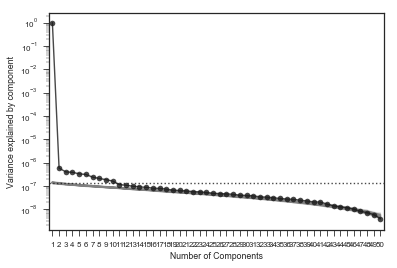

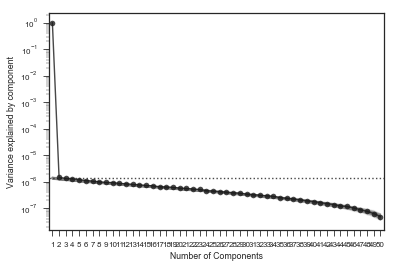

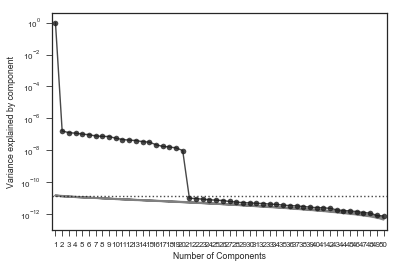

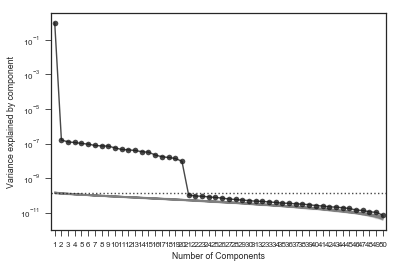

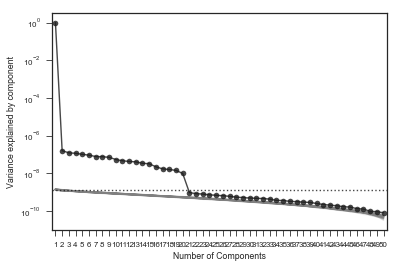

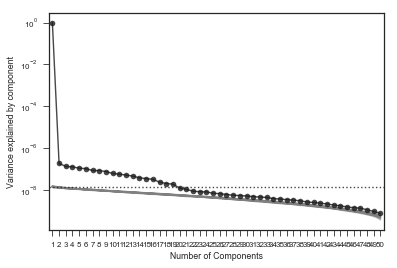

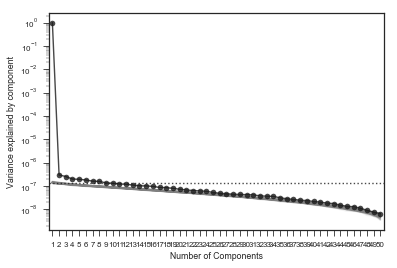

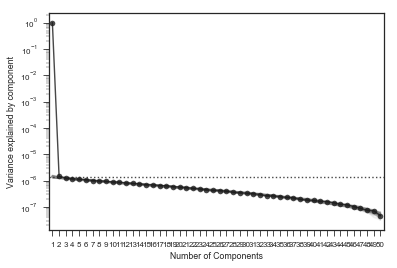

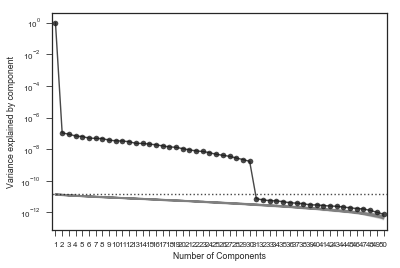

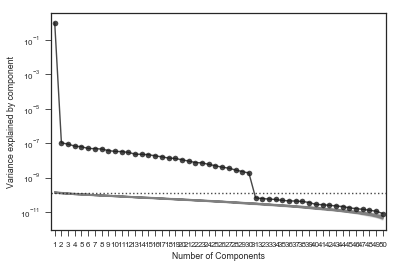

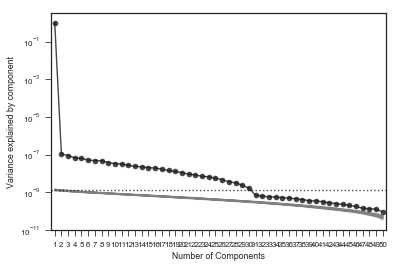

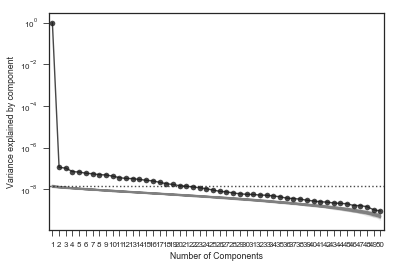

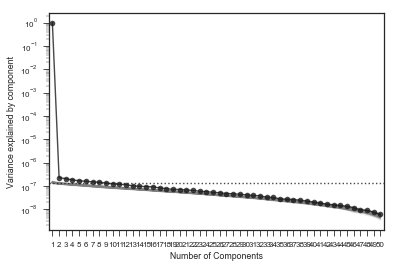

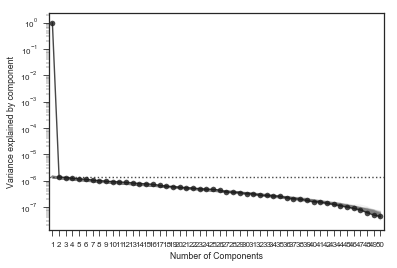

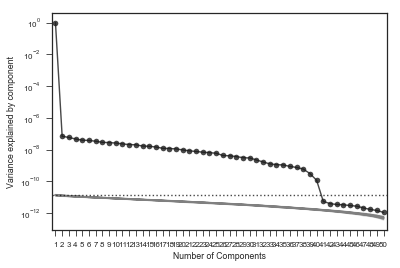

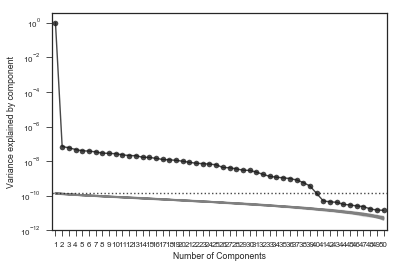

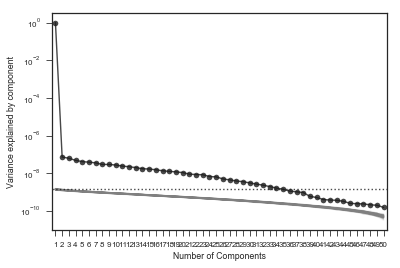

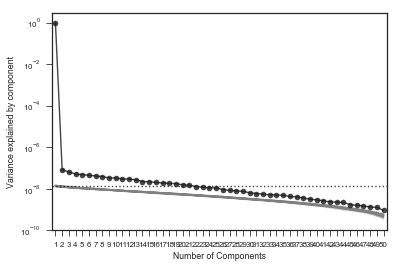

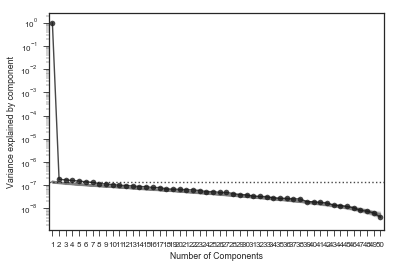

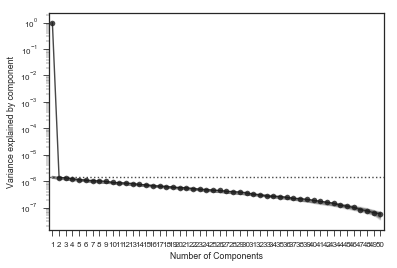

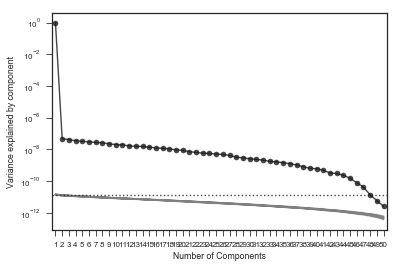

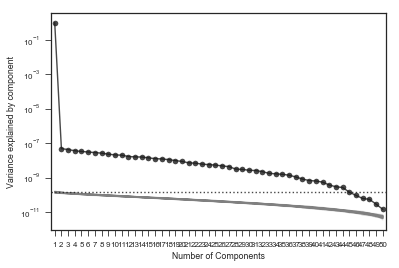

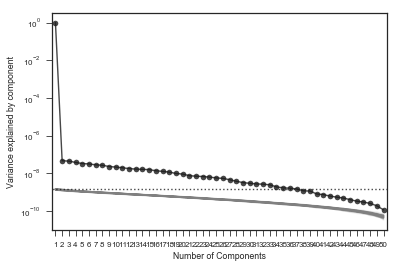

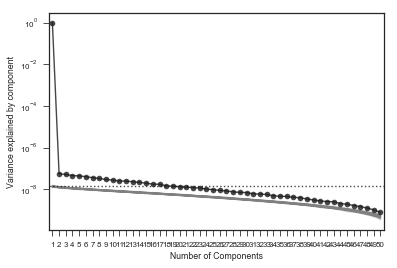

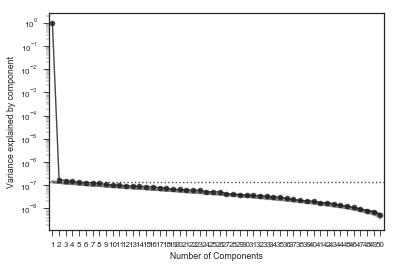

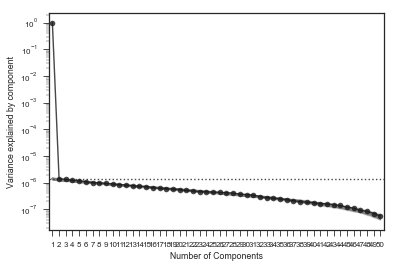

In [4]:
err_list = [1e-9,1e-8,1e-7,1e-6,1e-5,1e-4]

detect_dict = {}

for d_true,entries in entry_dict.items():
    f = entries[0]
    detect_dict[d_true] = []
    for e,err in enumerate(err_list):
        # data pulled from the truth with our measurement error

        this_f = np.asarray([np.random.normal(f.flatten()[i],np.sqrt(err)) for i in range(len(f.flatten()))]).reshape(f.shape[0],f.shape[1])
        fig,ax = plt.subplots()
        ax,max_d,s,s_squre = graphs.svd_noise_comparison_figure(ax,this_f,np.ones(this_f.shape)*np.sqrt(err),n_pulls=100,annotate=False,output=True)
        plt.yscale('log')
        
        detect_dict[d_true].append(max_d)
    

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/legend.py:593: UserWarning: The handle <matplotlib.lines.Line2D object at 0x1245ee128> has a label of '_' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


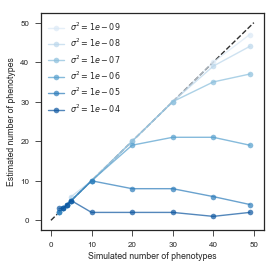

In [11]:
plt.figure(figsize=(4,4))
e_colors = sns.color_palette('Blues',len(err_list))
# e_names = ['Low Noise','Medium Noise','High Noise']
plt.plot([0,50],[0,50],'k--',alpha=0.9)
for e,err in enumerate(err_list):
    this_list = []
    d_list = []
    for d_true,out_list in detect_dict.items():
        this_list.append(out_list[e])
        d_list.append(d_true)
    
    plt.plot(d_list,this_list,color=e_colors[e],marker='o',alpha=0.7)
        

plt.xlabel('Simulated number of phenotypic components')
plt.ylabel('Detected number of phenotypic components')
plt.legend(['_']+[rf'$\sigma^2={err:.0e}$'for err in err_list])
plt.savefig('figureS1B_lines.pdf',bbox_inches='tight')

In [5]:
err_list = [1e-9,1e-8,1e-7,1e-6,1e-5,1e-4]

detect_dict_CV = {}

for d_true,entries in entry_dict.items():
    f = entries[0]
    detect_dict_CV[d_true] = []
    for e,err in enumerate(err_list):
        # data pulled from the truth with our measurement error

        this_f = np.asarray([np.random.normal(f.flatten()[i],np.sqrt(err)) for i in range(len(f.flatten()))]).reshape(f.shape[0],f.shape[1])
        
        for iteration in range(n_conditions):
            
            test_c = sorted(np.asarray([iteration]))
            train_c = [c for c in range(n_conditions) if c not in test_c]
#             train_c = sorted(np.random.choice(n_conditions,int(n_conditions/2),replace=False))
#             test_c = [c for c in range(n_conditions) if c not in train_c ]
            train_m = sorted(np.random.choice(n_mutants,int(n_mutants/2),replace=False))
            test_m = [m for m in range(n_mutants) if m not in train_m ]

            train = [train_c,train_m]
            test = [test_c,test_m]

            output = tools.SVD_predictions_train_test(this_f,train,test,by_condition=True,mse=True)

            sort_list = output[0]

            best_by_rank = output[0]
            if iteration == 0:
                total = np.asarray(best_by_rank)
            else:
                total = total + np.asarray(best_by_rank)
        
        detect_dict_CV[d_true].append(np.where(total==min(total))[0][0]+1)
    

In [63]:
len(train_c)

50

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/legend.py:593: UserWarning: The handle <matplotlib.lines.Line2D object at 0x123098b70> has a label of '_' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


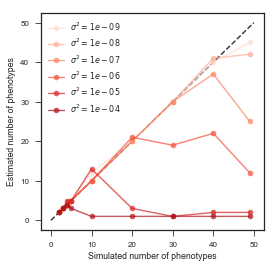

In [13]:
plt.figure(figsize=(4,4))
e_colors = sns.color_palette('Reds',len(err_list))
# e_names = ['Low Noise','Medium Noise','High Noise']
plt.plot([0,50],[0,50],'k--',alpha=0.9)
# for d_true,out_list in detect_dict_CV.items():
#     for e,err in enumerate(err_list):
#         plt.scatter(d_true,out_list[e],color=e_colors[e],alpha=0.9)
        
for e,err in enumerate(err_list):
    this_list = []
    d_list = []
    for d_true,out_list in detect_dict_CV.items():
        this_list.append(out_list[e])
        d_list.append(d_true)
    
    plt.plot(d_list,this_list,color=e_colors[e],marker='o',alpha=0.7)
        

plt.xlabel('Simulated number of phenotypic components')
plt.ylabel('Detected number of phenotypic components')
plt.legend(['_']+[rf'$\sigma^2={err:.0e}$'for err in err_list])
plt.savefig('figureS1C_lines.pdf',bbox_inches='tight')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/legend.py:593: UserWarning: The handle <matplotlib.lines.Line2D object at 0x120ad9d68> has a label of '_' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/legend.py:593: UserWarning: The handle <matplotlib.lines.Line2D object at 0x120fe0b38> has a label of '_' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


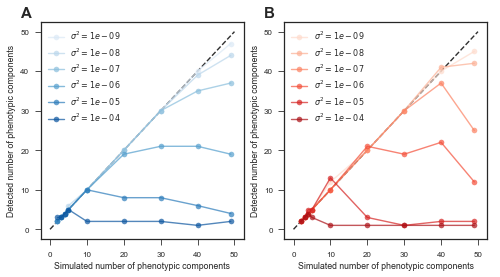

In [6]:
plt.figure(figsize=(8,4))

plt.subplot(121)
plt.text(s='A',x=-0.1,y=1.02,fontsize=15,fontweight='semibold',transform=plt.gca().transAxes)
e_colors = sns.color_palette('Blues',len(err_list))
# e_names = ['Low Noise','Medium Noise','High Noise']
plt.plot([0,50],[0,50],'k--',alpha=0.9)
for e,err in enumerate(err_list):
    this_list = []
    d_list = []
    for d_true,out_list in detect_dict.items():
        this_list.append(out_list[e])
        d_list.append(d_true)
    
    plt.plot(d_list,this_list,color=e_colors[e],marker='o',alpha=0.7)
        

plt.xlabel('Simulated number of phenotypic components')
plt.ylabel('Detected number of phenotypic components')
plt.legend(['_']+[rf'$\sigma^2={err:.0e}$'for err in err_list])
# plt.savefig('figureS1B_lines.pdf',bbox_inches='tight')

plt.subplot(122)
plt.text(s='B',x=-0.1,y=1.02,fontsize=15,fontweight='semibold',transform=plt.gca().transAxes)

e_colors = sns.color_palette('Reds',len(err_list))
# e_names = ['Low Noise','Medium Noise','High Noise']
plt.plot([0,50],[0,50],'k--',alpha=0.9)
# for d_true,out_list in detect_dict_CV.items():
#     for e,err in enumerate(err_list):
#         plt.scatter(d_true,out_list[e],color=e_colors[e],alpha=0.9)
        
for e,err in enumerate(err_list):
    this_list = []
    d_list = []
    for d_true,out_list in detect_dict_CV.items():
        this_list.append(out_list[e])
        d_list.append(d_true)
    
    plt.plot(d_list,this_list,color=e_colors[e],marker='o',alpha=0.7)
        

plt.xlabel('Simulated number of phenotypic components')
plt.ylabel('Detected number of phenotypic components')
plt.legend(['_']+[rf'$\sigma^2={err:.0e}$'for err in err_list])
# plt.savefig('figureS1C_lines.pdf',bbox_inches='tight')
plt.savefig('figure 3-figure supplement 1.pdf',bbox_inches='tight')